# Description

Runs gaussian mixture model on the z_score_std version of the data.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

3

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=3
env: OPEN_BLAS_NUM_THREADS=3
env: NUMEXPR_NUM_THREADS=3
env: OMP_NUM_THREADS=3


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
INITIAL_RANDOM_STATE = 60000

## Input data

In [6]:
INPUT_SUBSET = "z_score_std"

In [7]:
INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [8]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

## Clustering

In [9]:
from sklearn.mixture import GaussianMixture

In [10]:
CLUSTERING_ATTRIBUTES_TO_SAVE = ["n_clusters"]

In [11]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_MIN"] = 2
CLUSTERING_OPTIONS["K_MAX"] = 60  # sqrt(3749)
CLUSTERING_OPTIONS["N_REPS_PER_K"] = 5
CLUSTERING_OPTIONS["N_INIT"] = 10
CLUSTERING_OPTIONS["COVARIANCE_TYPE"] = "full"

display(CLUSTERING_OPTIONS)

{'K_MIN': 2,
 'K_MAX': 60,
 'N_REPS_PER_K': 5,
 'N_INIT': 10,
 'COVARIANCE_TYPE': 'full'}

In [12]:
CLUSTERERS = {}

idx = 0
random_state = INITIAL_RANDOM_STATE

for k in range(CLUSTERING_OPTIONS["K_MIN"], CLUSTERING_OPTIONS["K_MAX"] + 1):
    for i in range(CLUSTERING_OPTIONS["N_REPS_PER_K"]):
        clus = GaussianMixture(
            n_components=k,
            n_init=CLUSTERING_OPTIONS["N_INIT"],
            covariance_type=CLUSTERING_OPTIONS["COVARIANCE_TYPE"],
            random_state=random_state,
        )

        method_name = type(clus).__name__
        CLUSTERERS[f"{method_name} #{idx}"] = clus

        random_state = random_state + 1
        idx = idx + 1

In [13]:
display(len(CLUSTERERS))

295

In [14]:
_iter = iter(CLUSTERERS.items())
display(next(_iter))
display(next(_iter))

('GaussianMixture #0',
 GaussianMixture(n_components=2, n_init=10, random_state=60000))

('GaussianMixture #1',
 GaussianMixture(n_components=2, n_init=10, random_state=60001))

In [15]:
clustering_method_name = method_name
display(clustering_method_name)

'GaussianMixture'

## Output directory

In [16]:
# output dir for this notebook
RESULTS_DIR = Path(
    conf.RESULTS["CLUSTERING_RUNS_DIR"],
    f"{INPUT_SUBSET}-{INPUT_STEM}",
).resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/runs/z_score_std-projection-smultixcan-efo_partial-mashr-zscores')

# Load input file

In [17]:
data = pd.read_pickle(input_filepath)

In [18]:
data.shape

(3749, 987)

In [19]:
data.head()

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.553743,1.851060,-0.095721,0.931603,-0.515196,1.371264,-0.413165,0.729668,0.546338,0.901153,...,1.148776,1.649018,-1.375952,2.203063,0.810199,-0.987048,0.277710,-0.607613,0.572376,-0.660846
100002_raw-Energy,-1.313905,-0.421015,-0.310524,-0.201978,0.233028,0.693838,0.084129,0.572439,0.217866,1.296973,...,0.165430,0.799276,-0.361989,-0.008253,2.063780,-0.930765,-0.147007,1.601938,-0.273553,-0.560822
100003_raw-Protein,-0.645622,-0.997845,0.249039,0.256499,0.422357,0.829189,-0.169004,0.511550,0.002389,-0.057200,...,1.016791,1.019488,-2.148844,-0.065130,0.041052,-0.836118,-0.320571,1.325519,-0.341494,-0.495786
100004_raw-Fat,-0.913924,-1.837183,0.012095,-1.301315,0.205794,1.129114,0.019985,0.376660,-0.810272,0.843611,...,0.544266,0.576714,0.281731,-0.218963,1.258957,-1.131924,0.378545,0.842047,-0.622194,-0.160058
100005_raw-Carbohydrate,-0.523004,0.131379,-0.097802,-0.030526,-0.021500,-0.219116,0.668229,0.365700,1.102347,0.845625,...,-0.344740,0.079274,0.253427,0.236474,1.033895,-0.229105,0.364793,1.776714,0.190531,-1.459641


In [20]:
assert not data.isna().any().any()

# Clustering

## Generate ensemble

In [21]:
from clustering.ensembles.utils import generate_ensemble

In [22]:
ensemble = generate_ensemble(
    data,
    CLUSTERERS,
    attributes=CLUSTERING_ATTRIBUTES_TO_SAVE,
)

  0%|          | 0/295 [00:00<?, ?it/s]

  0%|          | 1/295 [00:10<49:40, 10.14s/it]

  1%|          | 2/295 [00:20<49:37, 10.16s/it]

  1%|          | 3/295 [00:30<49:35, 10.19s/it]

  1%|▏         | 4/295 [00:40<49:23, 10.18s/it]

  2%|▏         | 5/295 [00:50<49:09, 10.17s/it]

  2%|▏         | 6/295 [01:05<55:07, 11.45s/it]

  2%|▏         | 7/295 [01:19<59:18, 12.36s/it]

  3%|▎         | 8/295 [01:34<1:02:13, 13.01s/it]

  3%|▎         | 9/295 [01:48<1:04:05, 13.45s/it]

  3%|▎         | 10/295 [02:03<1:05:24, 13.77s/it]

  4%|▎         | 11/295 [02:22<1:12:53, 15.40s/it]

  4%|▍         | 12/295 [02:41<1:17:48, 16.50s/it]

  4%|▍         | 13/295 [03:00<1:20:54, 17.22s/it]

  5%|▍         | 14/295 [03:19<1:23:28, 17.82s/it]

  5%|▌         | 15/295 [03:38<1:25:06, 18.24s/it]

  5%|▌         | 16/295 [04:04<1:34:32, 20.33s/it]

  6%|▌         | 17/295 [04:28<1:39:34, 21.49s/it]

  6%|▌         | 18/295 [04:52<1:42:48, 22.27s/it]

  6%|▋         | 19/295 [05:17<1:46:12, 23.09s/it]

  7%|▋         | 20/295 [05:41<1:47:05, 23.37s/it]

  7%|▋         | 21/295 [06:12<1:56:37, 25.54s/it]

  7%|▋         | 22/295 [06:40<2:00:00, 26.38s/it]

  8%|▊         | 23/295 [07:09<2:03:27, 27.23s/it]

  8%|▊         | 24/295 [07:38<2:05:46, 27.85s/it]

  8%|▊         | 25/295 [08:07<2:06:45, 28.17s/it]

  9%|▉         | 26/295 [08:41<2:13:11, 29.71s/it]

  9%|▉         | 27/295 [09:17<2:20:57, 31.56s/it]

  9%|▉         | 28/295 [09:50<2:23:02, 32.14s/it]

 10%|▉         | 29/295 [10:24<2:24:17, 32.55s/it]

 10%|█         | 30/295 [11:00<2:28:51, 33.70s/it]

 11%|█         | 31/295 [11:37<2:33:10, 34.81s/it]

 11%|█         | 32/295 [12:15<2:36:34, 35.72s/it]

 11%|█         | 33/295 [12:53<2:39:03, 36.42s/it]

 12%|█▏        | 34/295 [13:31<2:40:06, 36.81s/it]

 12%|█▏        | 35/295 [14:09<2:40:47, 37.10s/it]

 12%|█▏        | 36/295 [14:51<2:46:32, 38.58s/it]

 13%|█▎        | 37/295 [15:33<2:50:12, 39.58s/it]

 13%|█▎        | 38/295 [16:14<2:52:18, 40.23s/it]

 13%|█▎        | 39/295 [16:56<2:53:56, 40.77s/it]

 14%|█▎        | 40/295 [17:39<2:55:07, 41.21s/it]

 14%|█▍        | 41/295 [18:25<3:00:41, 42.68s/it]

 14%|█▍        | 42/295 [19:11<3:04:03, 43.65s/it]

 15%|█▍        | 43/295 [19:57<3:06:35, 44.43s/it]

 15%|█▍        | 44/295 [20:43<3:07:54, 44.92s/it]

 15%|█▌        | 45/295 [21:29<3:09:05, 45.38s/it]

 16%|█▌        | 46/295 [22:20<3:14:34, 46.89s/it]

 16%|█▌        | 47/295 [23:10<3:18:04, 47.92s/it]

 16%|█▋        | 48/295 [24:01<3:20:34, 48.72s/it]

 17%|█▋        | 49/295 [24:52<3:22:35, 49.41s/it]

 17%|█▋        | 50/295 [25:43<3:23:30, 49.84s/it]

 17%|█▋        | 51/295 [26:38<3:29:06, 51.42s/it]

 18%|█▊        | 52/295 [27:33<3:32:40, 52.51s/it]

 18%|█▊        | 53/295 [28:28<3:34:30, 53.19s/it]

 18%|█▊        | 54/295 [29:23<3:35:57, 53.77s/it]

 19%|█▊        | 55/295 [30:18<3:36:48, 54.20s/it]

 19%|█▉        | 56/295 [31:17<3:42:17, 55.80s/it]

 19%|█▉        | 57/295 [32:17<3:46:06, 57.00s/it]

 20%|█▉        | 58/295 [33:17<3:48:15, 57.78s/it]

 20%|██        | 59/295 [34:16<3:49:13, 58.28s/it]

 20%|██        | 60/295 [35:16<3:49:29, 58.59s/it]

 21%|██        | 61/295 [36:19<3:54:32, 60.14s/it]

 21%|██        | 62/295 [37:23<3:58:03, 61.30s/it]

 21%|██▏       | 63/295 [38:27<4:00:10, 62.12s/it]

 22%|██▏       | 64/295 [39:31<4:01:15, 62.66s/it]

 22%|██▏       | 65/295 [40:35<4:01:28, 62.99s/it]

 22%|██▏       | 66/295 [41:43<4:06:32, 64.60s/it]

 23%|██▎       | 67/295 [42:52<4:09:41, 65.71s/it]

 23%|██▎       | 68/295 [44:00<4:11:52, 66.58s/it]

 23%|██▎       | 69/295 [45:08<4:12:30, 67.04s/it]

 24%|██▎       | 70/295 [46:17<4:12:33, 67.35s/it]

 24%|██▍       | 71/295 [47:30<4:18:26, 69.23s/it]

 24%|██▍       | 72/295 [48:43<4:21:26, 70.34s/it]

 25%|██▍       | 73/295 [49:56<4:23:24, 71.19s/it]

 25%|██▌       | 74/295 [51:10<4:24:43, 71.87s/it]

 25%|██▌       | 75/295 [52:23<4:24:52, 72.24s/it]

 26%|██▌       | 76/295 [53:40<4:28:58, 73.69s/it]

 26%|██▌       | 77/295 [54:57<4:31:24, 74.70s/it]

 26%|██▋       | 78/295 [56:14<4:33:05, 75.51s/it]

 27%|██▋       | 79/295 [57:32<4:33:41, 76.02s/it]

 27%|██▋       | 80/295 [58:49<4:33:25, 76.31s/it]

 27%|██▋       | 81/295 [1:00:10<4:37:47, 77.89s/it]

 28%|██▊       | 82/295 [1:01:32<4:40:50, 79.11s/it]

 28%|██▊       | 83/295 [1:02:54<4:42:17, 79.89s/it]

 28%|██▊       | 84/295 [1:04:16<4:42:54, 80.45s/it]

 29%|██▉       | 85/295 [1:05:37<4:42:51, 80.82s/it]

 29%|██▉       | 86/295 [1:07:03<4:46:45, 82.32s/it]

 29%|██▉       | 87/295 [1:08:29<4:49:07, 83.40s/it]

 30%|██▉       | 88/295 [1:09:55<4:50:47, 84.29s/it]

 30%|███       | 89/295 [1:11:21<4:50:55, 84.74s/it]

 31%|███       | 90/295 [1:12:47<4:50:40, 85.08s/it]

 31%|███       | 91/295 [1:14:18<4:54:57, 86.75s/it]

 31%|███       | 92/295 [1:15:48<4:57:32, 87.94s/it]

 32%|███▏      | 93/295 [1:17:19<4:58:41, 88.72s/it]

 32%|███▏      | 94/295 [1:18:50<4:59:10, 89.30s/it]

 32%|███▏      | 95/295 [1:20:20<4:59:08, 89.74s/it]

 33%|███▎      | 96/295 [1:21:55<5:02:53, 91.32s/it]

 33%|███▎      | 97/295 [1:23:30<5:05:00, 92.43s/it]

 33%|███▎      | 98/295 [1:25:05<5:05:59, 93.19s/it]

 34%|███▎      | 99/295 [1:26:41<5:06:35, 93.86s/it]

 34%|███▍      | 100/295 [1:28:16<5:06:29, 94.30s/it]

 34%|███▍      | 101/295 [1:29:55<5:09:52, 95.84s/it]

 35%|███▍      | 102/295 [1:31:35<5:12:00, 96.99s/it]

 35%|███▍      | 103/295 [1:33:15<5:12:52, 97.77s/it]

 35%|███▌      | 104/295 [1:34:54<5:13:03, 98.34s/it]

 36%|███▌      | 105/295 [1:36:34<5:12:50, 98.79s/it]

 36%|███▌      | 106/295 [1:38:18<5:16:15, 100.40s/it]

 36%|███▋      | 107/295 [1:40:03<5:18:05, 101.52s/it]

 37%|███▋      | 108/295 [1:41:47<5:18:58, 102.35s/it]

 37%|███▋      | 109/295 [1:43:31<5:19:03, 102.92s/it]

 37%|███▋      | 110/295 [1:45:15<5:18:10, 103.19s/it]

 38%|███▊      | 111/295 [1:47:03<5:21:15, 104.76s/it]

 38%|███▊      | 112/295 [1:48:52<5:23:06, 105.94s/it]

 38%|███▊      | 113/295 [1:50:40<5:23:28, 106.64s/it]

 39%|███▊      | 114/295 [1:52:29<5:23:49, 107.35s/it]

 39%|███▉      | 115/295 [1:54:18<5:23:11, 107.73s/it]

 39%|███▉      | 116/295 [1:56:11<5:25:49, 109.22s/it]

 40%|███▉      | 117/295 [1:58:03<5:26:59, 110.22s/it]

 40%|████      | 118/295 [1:59:56<5:27:19, 110.96s/it]

 40%|████      | 119/295 [2:01:49<5:27:07, 111.52s/it]

 41%|████      | 120/295 [2:03:41<5:26:02, 111.79s/it]

 41%|████      | 121/295 [2:05:39<5:29:14, 113.53s/it]

 41%|████▏     | 122/295 [2:07:36<5:30:43, 114.70s/it]

 42%|████▏     | 123/295 [2:09:34<5:31:16, 115.56s/it]

 42%|████▏     | 124/295 [2:11:31<5:30:42, 116.04s/it]

 42%|████▏     | 125/295 [2:13:28<5:29:42, 116.37s/it]

 43%|████▎     | 126/295 [2:15:30<5:32:44, 118.14s/it]

 43%|████▎     | 127/295 [2:17:32<5:33:54, 119.25s/it]

 43%|████▎     | 128/295 [2:19:34<5:34:24, 120.15s/it]

 44%|████▎     | 129/295 [2:21:36<5:33:28, 120.53s/it]

 44%|████▍     | 130/295 [2:23:37<5:32:21, 120.86s/it]

 44%|████▍     | 131/295 [2:25:43<5:34:18, 122.31s/it]

 45%|████▍     | 132/295 [2:27:49<5:35:36, 123.54s/it]

 45%|████▌     | 133/295 [2:29:55<5:35:23, 124.22s/it]

 45%|████▌     | 134/295 [2:32:02<5:35:16, 124.95s/it]

 46%|████▌     | 135/295 [2:34:08<5:34:06, 125.29s/it]

 46%|████▌     | 136/295 [2:36:19<5:36:13, 126.88s/it]

 46%|████▋     | 137/295 [2:38:29<5:37:16, 128.08s/it]

 47%|████▋     | 138/295 [2:40:40<5:37:07, 128.84s/it]

 47%|████▋     | 139/295 [2:42:51<5:36:17, 129.35s/it]

 47%|████▋     | 140/295 [2:45:01<5:35:02, 129.69s/it]

 48%|████▊     | 141/295 [2:47:16<5:36:54, 131.26s/it]

 48%|████▊     | 142/295 [2:49:31<5:37:47, 132.47s/it]

 48%|████▊     | 143/295 [2:51:47<5:37:38, 133.28s/it]

 49%|████▉     | 144/295 [2:54:01<5:36:34, 133.74s/it]

 49%|████▉     | 145/295 [2:56:16<5:35:20, 134.13s/it]

 49%|████▉     | 146/295 [2:58:36<5:36:56, 135.68s/it]

 50%|████▉     | 147/295 [3:00:55<5:37:27, 136.81s/it]

 50%|█████     | 148/295 [3:03:15<5:37:05, 137.59s/it]

 51%|█████     | 149/295 [3:05:34<5:35:50, 138.01s/it]

 51%|█████     | 150/295 [3:07:52<5:34:06, 138.25s/it]

 51%|█████     | 151/295 [3:10:17<5:36:44, 140.31s/it]

 52%|█████▏    | 152/295 [3:12:42<5:37:45, 141.72s/it]

 52%|█████▏    | 153/295 [3:15:07<5:37:43, 142.70s/it]

 52%|█████▏    | 154/295 [3:17:33<5:37:04, 143.44s/it]

 53%|█████▎    | 155/295 [3:19:58<5:35:44, 143.89s/it]

 53%|█████▎    | 156/295 [3:22:26<5:36:25, 145.22s/it]

 53%|█████▎    | 157/295 [3:24:54<5:35:58, 146.08s/it]

 54%|█████▎    | 158/295 [3:27:22<5:34:42, 146.59s/it]

 54%|█████▍    | 159/295 [3:29:50<5:33:14, 147.02s/it]

 54%|█████▍    | 160/295 [3:32:18<5:31:40, 147.41s/it]

 55%|█████▍    | 161/295 [3:34:50<5:32:31, 148.89s/it]

 55%|█████▍    | 162/295 [3:37:23<5:32:22, 149.94s/it]

 55%|█████▌    | 163/295 [3:39:55<5:31:17, 150.59s/it]

 56%|█████▌    | 164/295 [3:42:27<5:29:45, 151.04s/it]

 56%|█████▌    | 165/295 [3:44:59<5:28:01, 151.40s/it]

 56%|█████▋    | 166/295 [3:47:36<5:28:51, 152.96s/it]

 57%|█████▋    | 167/295 [3:50:13<5:28:46, 154.11s/it]

 57%|█████▋    | 168/295 [3:52:50<5:27:58, 154.95s/it]

 57%|█████▋    | 169/295 [3:55:26<5:26:33, 155.50s/it]

 58%|█████▊    | 170/295 [3:58:03<5:24:51, 155.94s/it]

 58%|█████▊    | 171/295 [4:00:45<5:25:33, 157.53s/it]

 58%|█████▊    | 172/295 [4:03:25<5:25:02, 158.56s/it]

 59%|█████▊    | 173/295 [4:06:07<5:24:00, 159.35s/it]

 59%|█████▉    | 174/295 [4:08:48<5:22:23, 159.86s/it]

 59%|█████▉    | 175/295 [4:11:29<5:20:36, 160.31s/it]

 60%|█████▉    | 176/295 [4:14:15<5:21:12, 161.95s/it]

 60%|██████    | 177/295 [4:17:01<5:20:53, 163.17s/it]

 60%|██████    | 178/295 [4:19:47<5:19:37, 163.91s/it]

 61%|██████    | 179/295 [4:22:32<5:17:41, 164.33s/it]

 61%|██████    | 180/295 [4:25:18<5:15:47, 164.76s/it]

 61%|██████▏   | 181/295 [4:28:08<5:16:23, 166.52s/it]

 62%|██████▏   | 182/295 [4:30:58<5:15:26, 167.49s/it]

 62%|██████▏   | 183/295 [4:33:48<5:13:51, 168.13s/it]

 62%|██████▏   | 184/295 [4:36:38<5:12:07, 168.71s/it]

 63%|██████▎   | 185/295 [4:39:28<5:10:19, 169.27s/it]

 63%|██████▎   | 186/295 [4:42:23<5:10:33, 170.95s/it]

 63%|██████▎   | 187/295 [4:45:18<5:09:41, 172.06s/it]

 64%|██████▎   | 188/295 [4:48:13<5:08:20, 172.90s/it]

 64%|██████▍   | 189/295 [4:51:08<5:06:37, 173.56s/it]

 64%|██████▍   | 190/295 [4:54:03<5:04:39, 174.09s/it]

 65%|██████▍   | 191/295 [4:57:02<5:04:31, 175.69s/it]

 65%|██████▌   | 192/295 [5:00:02<5:03:32, 176.82s/it]

 65%|██████▌   | 193/295 [5:03:01<5:01:45, 177.51s/it]

 66%|██████▌   | 194/295 [5:06:00<4:59:28, 177.91s/it]

 66%|██████▌   | 195/295 [5:08:59<4:57:06, 178.27s/it]

 66%|██████▋   | 196/295 [5:12:03<4:56:46, 179.86s/it]

 67%|██████▋   | 197/295 [5:15:05<4:55:12, 180.74s/it]

 67%|██████▋   | 198/295 [5:18:08<4:53:20, 181.45s/it]

 67%|██████▋   | 199/295 [5:21:12<4:51:14, 182.03s/it]

 68%|██████▊   | 200/295 [5:24:15<4:48:54, 182.47s/it]

 68%|██████▊   | 201/295 [5:27:23<4:48:11, 183.95s/it]

 68%|██████▊   | 202/295 [5:30:30<4:46:44, 184.99s/it]

 69%|██████▉   | 203/295 [5:33:38<4:44:52, 185.79s/it]

 69%|██████▉   | 204/295 [5:36:45<4:42:28, 186.25s/it]

 69%|██████▉   | 205/295 [5:39:53<4:39:57, 186.64s/it]

 70%|██████▉   | 206/295 [5:43:04<4:39:08, 188.19s/it]

 70%|███████   | 207/295 [5:46:17<4:37:43, 189.35s/it]

 71%|███████   | 208/295 [5:49:28<4:35:36, 190.07s/it]

 71%|███████   | 209/295 [5:52:40<4:33:14, 190.63s/it]

 71%|███████   | 210/295 [5:55:52<4:30:44, 191.11s/it]

 72%|███████▏  | 211/295 [5:59:09<4:29:42, 192.65s/it]

 72%|███████▏  | 212/295 [6:02:25<4:27:54, 193.67s/it]

 72%|███████▏  | 213/295 [6:05:41<4:25:51, 194.53s/it]

 73%|███████▎  | 214/295 [6:08:58<4:23:35, 195.26s/it]

 73%|███████▎  | 215/295 [6:12:15<4:20:48, 195.60s/it]

 73%|███████▎  | 216/295 [6:15:36<4:19:43, 197.26s/it]

 74%|███████▎  | 217/295 [6:18:56<4:17:45, 198.28s/it]

 74%|███████▍  | 218/295 [6:22:17<4:15:26, 199.04s/it]

 74%|███████▍  | 219/295 [6:25:38<4:12:41, 199.50s/it]

 75%|███████▍  | 220/295 [6:28:58<4:09:44, 199.79s/it]

 75%|███████▍  | 221/295 [6:32:23<4:08:13, 201.27s/it]

 75%|███████▌  | 222/295 [6:35:48<4:06:12, 202.36s/it]

 76%|███████▌  | 223/295 [6:39:14<4:04:00, 203.34s/it]

 76%|███████▌  | 224/295 [6:42:39<4:01:30, 204.09s/it]

 76%|███████▋  | 225/295 [6:46:05<3:58:44, 204.64s/it]

 77%|███████▋  | 226/295 [6:49:35<3:57:10, 206.25s/it]

 77%|███████▋  | 227/295 [6:53:05<3:55:05, 207.43s/it]

 77%|███████▋  | 228/295 [6:56:35<3:52:27, 208.17s/it]

 78%|███████▊  | 229/295 [7:00:05<3:49:32, 208.67s/it]

 78%|███████▊  | 230/295 [7:03:36<3:46:41, 209.25s/it]

 78%|███████▊  | 231/295 [7:07:13<3:45:43, 211.62s/it]

 79%|███████▊  | 232/295 [7:10:50<3:43:57, 213.29s/it]

 79%|███████▉  | 233/295 [7:14:27<3:41:27, 214.32s/it]

 79%|███████▉  | 234/295 [7:18:04<3:38:51, 215.26s/it]

 80%|███████▉  | 235/295 [7:21:41<3:35:47, 215.80s/it]

 80%|████████  | 236/295 [7:25:21<3:33:10, 216.79s/it]

 80%|████████  | 237/295 [7:29:00<3:30:13, 217.47s/it]

 81%|████████  | 238/295 [7:32:39<3:27:06, 218.00s/it]

 81%|████████  | 239/295 [7:36:18<3:23:50, 218.40s/it]

 81%|████████▏ | 240/295 [7:39:58<3:20:28, 218.69s/it]

 82%|████████▏ | 241/295 [7:43:41<3:18:10, 220.20s/it]

 82%|████████▏ | 242/295 [7:47:25<3:15:30, 221.34s/it]

 82%|████████▏ | 243/295 [7:51:09<3:12:22, 221.96s/it]

 83%|████████▎ | 244/295 [7:54:53<3:09:12, 222.60s/it]

 83%|████████▎ | 245/295 [7:58:36<3:05:45, 222.90s/it]

 83%|████████▎ | 246/295 [8:02:24<3:03:11, 224.32s/it]

 84%|████████▎ | 247/295 [8:06:12<3:00:16, 225.35s/it]

 84%|████████▍ | 248/295 [8:09:59<2:57:05, 226.07s/it]

 84%|████████▍ | 249/295 [8:13:47<2:53:42, 226.58s/it]

 85%|████████▍ | 250/295 [8:17:36<2:50:19, 227.10s/it]

 85%|████████▌ | 251/295 [8:21:28<2:47:48, 228.83s/it]

 85%|████████▌ | 252/295 [8:25:21<2:44:52, 230.07s/it]

 86%|████████▌ | 253/295 [8:29:13<2:41:19, 230.47s/it]

 86%|████████▌ | 254/295 [8:33:05<2:37:53, 231.05s/it]

 86%|████████▋ | 255/295 [8:36:58<2:34:21, 231.53s/it]

 87%|████████▋ | 256/295 [8:40:54<2:31:28, 233.03s/it]

 87%|████████▋ | 257/295 [8:44:51<2:28:16, 234.11s/it]

 87%|████████▋ | 258/295 [8:48:47<2:24:45, 234.73s/it]

 88%|████████▊ | 259/295 [8:52:44<2:21:16, 235.47s/it]

 88%|████████▊ | 260/295 [8:56:41<2:17:33, 235.82s/it]

 88%|████████▊ | 261/295 [9:00:42<2:14:30, 237.37s/it]

 89%|████████▉ | 262/295 [9:04:43<2:11:12, 238.56s/it]

 89%|████████▉ | 263/295 [9:08:44<2:07:34, 239.22s/it]

 89%|████████▉ | 264/295 [9:12:45<2:03:53, 239.79s/it]

 90%|████████▉ | 265/295 [9:16:47<2:00:09, 240.31s/it]

 90%|█████████ | 266/295 [9:20:53<1:56:58, 242.01s/it]

 91%|█████████ | 267/295 [9:24:58<1:53:27, 243.14s/it]

 91%|█████████ | 268/295 [9:29:04<1:49:47, 243.96s/it]

 91%|█████████ | 269/295 [9:33:10<1:45:57, 244.52s/it]

 92%|█████████▏| 270/295 [9:37:16<1:42:02, 244.90s/it]

 92%|█████████▏| 271/295 [9:41:26<1:38:35, 246.47s/it]

 92%|█████████▏| 272/295 [9:45:37<1:34:56, 247.67s/it]

 93%|█████████▎| 273/295 [9:49:47<1:31:06, 248.50s/it]

 93%|█████████▎| 274/295 [9:53:58<1:27:11, 249.10s/it]

 93%|█████████▎| 275/295 [9:58:08<1:23:10, 249.51s/it]

 94%|█████████▎| 276/295 [10:02:23<1:19:29, 251.03s/it]

 94%|█████████▍| 277/295 [10:06:38<1:15:40, 252.25s/it]

 94%|█████████▍| 278/295 [10:10:52<1:11:40, 253.00s/it]

 95%|█████████▍| 279/295 [10:15:08<1:07:38, 253.66s/it]

 95%|█████████▍| 280/295 [10:19:22<1:03:28, 253.91s/it]

 95%|█████████▌| 281/295 [10:23:42<59:38, 255.58s/it]  

 96%|█████████▌| 282/295 [10:28:01<55:38, 256.77s/it]

 96%|█████████▌| 283/295 [10:32:20<51:30, 257.52s/it]

 96%|█████████▋| 284/295 [10:36:39<47:17, 257.94s/it]

 97%|█████████▋| 285/295 [10:40:58<43:02, 258.24s/it]

 97%|█████████▋| 286/295 [10:45:22<38:59, 259.92s/it]

 97%|█████████▋| 287/295 [10:49:46<34:48, 261.09s/it]

 98%|█████████▊| 288/295 [10:54:09<30:32, 261.81s/it]

 98%|█████████▊| 289/295 [10:58:33<26:14, 262.45s/it]

 98%|█████████▊| 290/295 [11:02:57<21:54, 262.87s/it]

 99%|█████████▊| 291/295 [11:07:25<17:37, 264.29s/it]

 99%|█████████▉| 292/295 [11:11:53<13:16, 265.43s/it]

 99%|█████████▉| 293/295 [11:16:21<08:52, 266.27s/it]

100%|█████████▉| 294/295 [11:20:49<04:26, 266.72s/it]

100%|██████████| 295/295 [11:25:17<00:00, 267.21s/it]

100%|██████████| 295/295 [11:25:17<00:00, 139.38s/it]

In [23]:
# the number should be close to 295 (the number of partitions generated by k-means/spectral clustering)
ensemble.shape

(295, 3)

In [24]:
ensemble.head()

,clusterer_params,partition,n_clusters
clusterer_id,,,
GaussianMixture #0,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
GaussianMixture #1,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
GaussianMixture #2,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
GaussianMixture #3,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
GaussianMixture #4,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2


In [25]:
ensemble["n_clusters"].value_counts().head()

60    5
16    5
28    5
27    5
26    5
Name: n_clusters, dtype: int64

In [26]:
ensemble_stats = ensemble["n_clusters"].describe()
display(ensemble_stats)

count    295.000000
mean      31.000000
std       17.058323
min        2.000000
25%       16.000000
50%       31.000000
75%       46.000000
max       60.000000
Name: n_clusters, dtype: float64

## Testing

In [27]:
assert ensemble_stats["min"] > 1

In [28]:
assert not ensemble["n_clusters"].isna().any()

In [29]:
assert ensemble.shape[0] == len(CLUSTERERS)

In [30]:
# all partitions have the right size
assert np.all(
    [part["partition"].shape[0] == data.shape[0] for idx, part in ensemble.iterrows()]
)

In [31]:
# no partition has negative clusters (noisy points)
assert not np.any([(part["partition"] < 0).any() for idx, part in ensemble.iterrows()])

## Add clustering quality measures

In [32]:
from sklearn.metrics import calinski_harabasz_score

In [33]:
ensemble = ensemble.assign(
    ch_score=ensemble["partition"].apply(lambda x: calinski_harabasz_score(data, x))
)

In [34]:
ensemble.shape

(295, 4)

In [35]:
ensemble.head()

,clusterer_params,partition,n_clusters,ch_score
clusterer_id,,,,
GaussianMixture #0,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,209.908957
GaussianMixture #1,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,209.908957
GaussianMixture #2,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,209.908957
GaussianMixture #3,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,209.908957
GaussianMixture #4,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,209.908957


## Save

In [36]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/runs/z_score_std-projection-smultixcan-efo_partial-mashr-zscores/GaussianMixture-COVARIANCE_TYPE_full-K_MAX_60-K_MIN_2-N_INIT_10-N_REPS_PER_K_5.pkl')

In [37]:
ensemble.to_pickle(output_filename)

# Cluster quality

In [38]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = ensemble.groupby(["n_clusters"]).mean()
    display(_df)

,ch_score
n_clusters,
2,209.908957
3,135.958945
4,103.958809
5,85.575318
6,72.135677
7,61.304279
8,52.695139
9,47.882176
10,43.227057


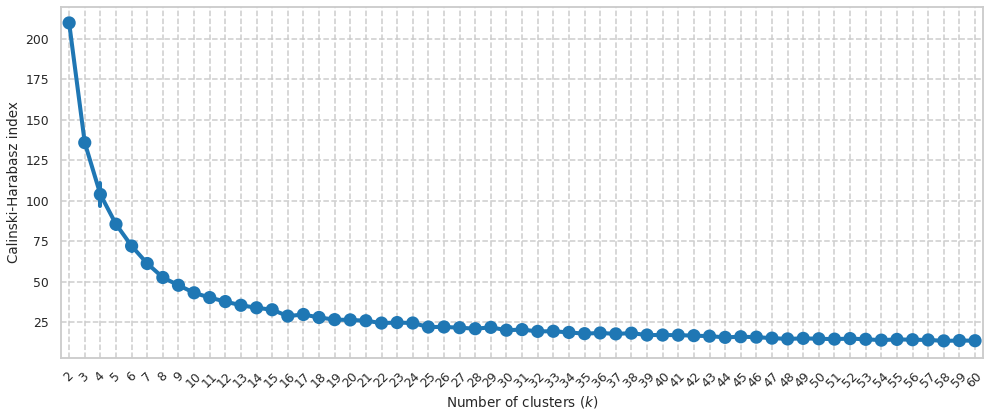

In [39]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="ch_score")
    ax.set_ylabel("Calinski-Harabasz index")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

# Stability

## Group ensemble by n_clusters

In [40]:
parts = ensemble.groupby("n_clusters").apply(
    lambda x: np.concatenate(x["partition"].apply(lambda x: x.reshape(1, -1)), axis=0)
)

In [41]:
parts.head()

n_clusters
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3    [[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,...
4    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
5    [[3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0,...
6    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 1.0, 1.0,...
dtype: object

In [42]:
assert np.all(
    [
        parts.loc[k].shape == (CLUSTERING_OPTIONS["N_REPS_PER_K"], data.shape[0])
        for k in parts.index
    ]
)

## Compute stability

In [43]:
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import pdist

In [44]:
parts_ari = pd.Series(
    {k: pdist(parts.loc[k], metric=ari) for k in parts.index}, name="k"
)

In [45]:
parts_ari_stability = parts_ari.apply(lambda x: x.mean())
display(parts_ari_stability.sort_values(ascending=False).head(15))

2     1.000000
3     1.000000
4     0.706709
6     0.654032
5     0.562892
7     0.198969
8     0.158953
9     0.156636
10    0.120957
13    0.102207
12    0.101988
11    0.100751
22    0.090791
14    0.090578
52    0.087660
Name: k, dtype: float64

In [46]:
parts_ari_df = pd.DataFrame.from_records(parts_ari.tolist()).set_index(
    parts_ari.index.copy()
)

In [47]:
parts_ari_df.shape

(59, 10)

In [48]:
assert (
    int(
        (CLUSTERING_OPTIONS["N_REPS_PER_K"] * (CLUSTERING_OPTIONS["N_REPS_PER_K"] - 1))
        / 2
    )
    == parts_ari_df.shape[1]
)

In [49]:
parts_ari_df.head()

,0,1,2,3,4,5,6,7,8,9
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.316450,0.300467,0.312368,0.316450,0.951973,0.978283,1.000000,0.960844,0.951973,0.978283
5,0.255985,0.302420,0.307365,0.257242,0.688087,0.623300,0.989519,0.885976,0.692109,0.626916
6,0.170649,0.963083,0.962127,0.966082,0.168698,0.168155,0.168616,0.995114,0.989385,0.988413


## Save

In [50]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-stability-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/runs/z_score_std-projection-smultixcan-efo_partial-mashr-zscores/GaussianMixture-stability-COVARIANCE_TYPE_full-K_MAX_60-K_MIN_2-N_INIT_10-N_REPS_PER_K_5.pkl')

In [51]:
parts_ari_df.to_pickle(output_filename)

## Stability plot

In [52]:
parts_ari_df_plot = (
    parts_ari_df.stack()
    .reset_index()
    .rename(columns={"level_0": "k", "level_1": "idx", 0: "ari"})
)

In [53]:
parts_ari_df_plot.dtypes

k        int64
idx      int64
ari    float64
dtype: object

In [54]:
parts_ari_df_plot.head()

,k,idx,ari
0,2,0,1.0
1,2,1,1.0
2,2,2,1.0
3,2,3,1.0
4,2,4,1.0


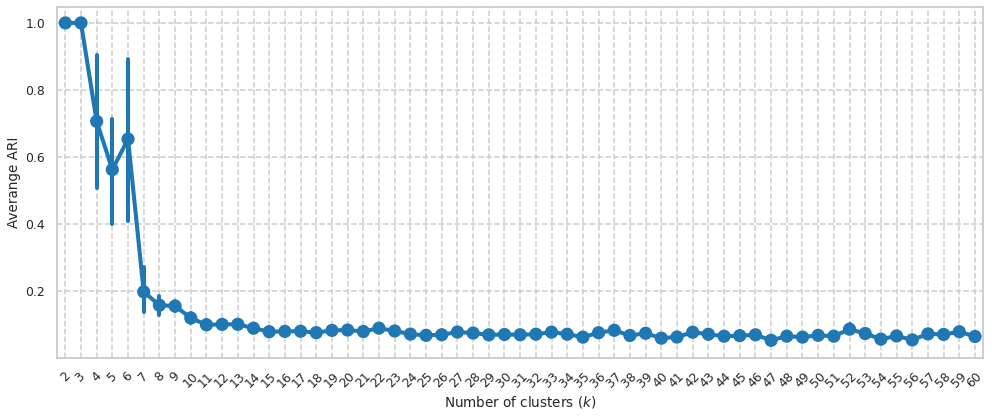

In [55]:
# with sns.axes_style('whitegrid', {'grid.linestyle': '--'}):
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=parts_ari_df_plot, x="k", y="ari")
    ax.set_ylabel("Averange ARI")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #     ax.set_ylim(0.0, 1.0)
    #     ax.set_xlim(CLUSTERING_OPTIONS['K_MIN'], CLUSTERING_OPTIONS['K_MAX'])
    plt.grid(True)
    plt.tight_layout()